### DDA
- 목표변수 : 심결요양급여비용총액
- 설명변수 : 수술여부, 공상 등 구분, 요양일수, 입내원일수, 총처방일수

In [2]:
import pandas as pd

In [3]:
df_NBM = pd.read_csv('../../dataset/df_NBM.csv')
df_NBM.head(2)

,Unnamed: 0,OFIJ_TYPE,OPRTN_YN,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,ED_RC_TOT_AMT
0,0,0,0,1,1,30,7570
1,1,0,0,2,2,60,18160


In [4]:
df_NBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4629 non-null   int64 
 1   OFIJ_TYPE        4522 non-null   object
 2   OPRTN_YN         4629 non-null   int64 
 3   MDCARE_DD_CNT    4629 non-null   int64 
 4   VSHSP_DD_CNT     4629 non-null   int64 
 5   TOT_PRSC_DD_CNT  4629 non-null   int64 
 6   ED_RC_TOT_AMT    4629 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 253.3+ KB


In [7]:
df_NBM['OFIJ_TYPE'].unique()

array(['0', nan, 'B'], dtype=object)

#### 데이터 타입 확인 후 변환
1. 목표변수 : ED_RC_TOT_AMT(심결요양급여비용총액) -> 연속형
2. 설명변수
    * 연속형 : MDCARE_DD_CNT(요양일수), VSHSP_DD_CNT(입내원일수), TOT_PRSC_DD_CNT(총처방일수)
    * 범주형 : OPRTN_YN(수술여부), OFIJ_TYPE(공상 등 구분)

In [8]:
df_NBM['OPRTN_YN'] = df_NBM['OPRTN_YN'].astype(str)

In [9]:
df_NBM.dtypes

Unnamed: 0          int64
OFIJ_TYPE          object
OPRTN_YN           object
MDCARE_DD_CNT       int64
VSHSP_DD_CNT        int64
TOT_PRSC_DD_CNT     int64
ED_RC_TOT_AMT       int64
dtype: object

In [10]:
import matplotlib.pyplot as plt
# 한글처리
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [11]:
df_NBM[['MDCARE_DD_CNT','VSHSP_DD_CNT','TOT_PRSC_DD_CNT','ED_RC_TOT_AMT']].describe()

,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,ED_RC_TOT_AMT
count,4629.000000,4629.000000,4629.000000,4.629000e+03
mean,1.923094,1.197235,32.529272,1.569900e+04
std,5.055881,1.470314,19.974645,5.979246e+04
min,1.000000,1.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,30.000000,8.780000e+03
50%,1.000000,1.000000,30.000000,1.007000e+04
75%,1.000000,1.000000,30.000000,1.169000e+04
max,70.000000,37.000000,190.000000,2.138690e+06


In [12]:
# 연속형 확인
continues_list = df_NBM[['MDCARE_DD_CNT','VSHSP_DD_CNT','TOT_PRSC_DD_CNT','ED_RC_TOT_AMT']].columns.to_list()

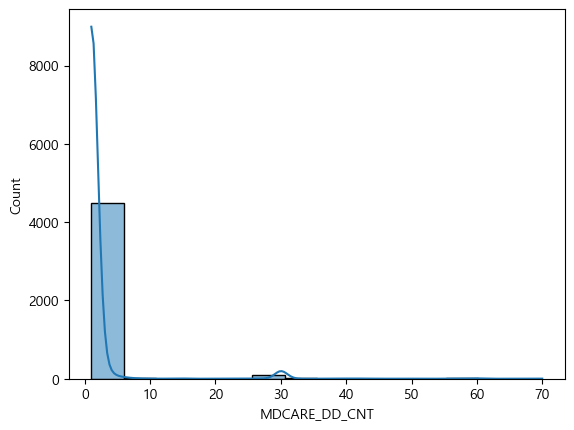

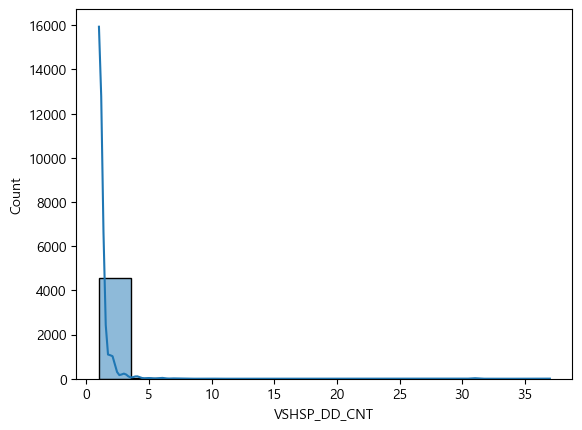

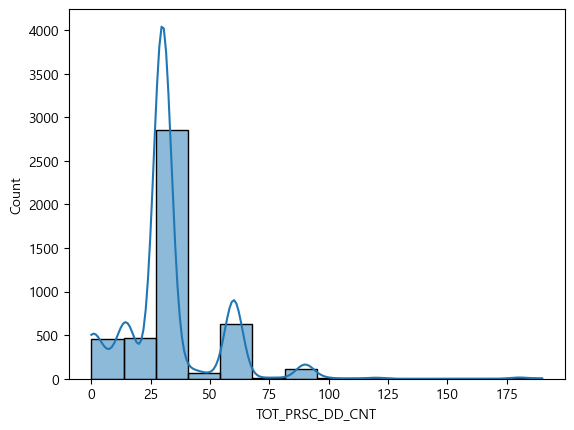

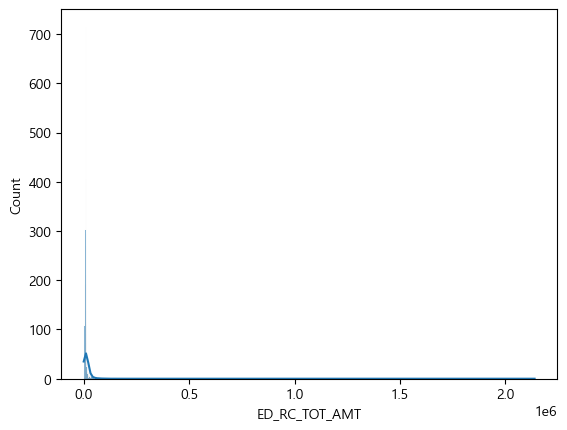

In [14]:
for continues in continues_list :
    sns.histplot(data=df_NBM, x=continues, kde=True)
    plt.show()

In [15]:
# 범주형 확인
df_NBM[['OFIJ_TYPE','OPRTN_YN']].describe(include=object)

,OFIJ_TYPE,OPRTN_YN
count,4522,4629
unique,2,2
top,0,0
freq,4520,4626


<Axes: xlabel='OFIJ_TYPE', ylabel='count'>

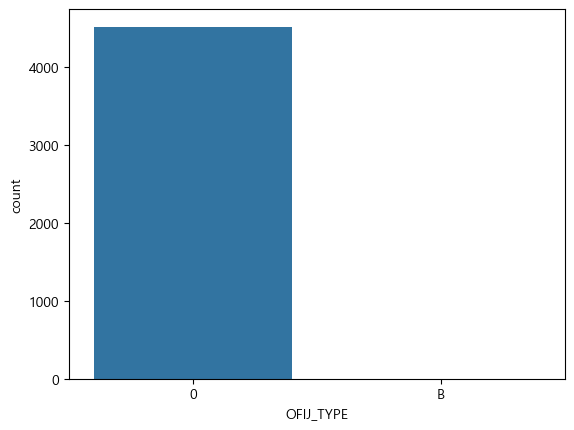

In [16]:
sns.countplot(data=df_NBM, x='OFIJ_TYPE')

<Axes: xlabel='OPRTN_YN', ylabel='count'>

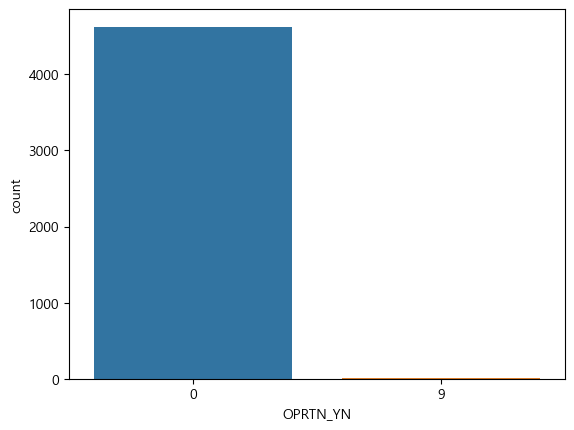

In [17]:
sns.countplot(data=df_NBM, x='OPRTN_YN')